# <font color=#E94560>MINI PROJECT OF CUSTOMER SEGMENTATION</font>

# <font color=#E94560>Table of Content</font>

1. Introduction and Objectives
2. Basic Libraries and File Imports
3. Exploratory Data Analysis
4. Data Preparation 
5. Creating Models
5.1 K-Means Clustering
5.2 Hierarchical Clustering
5.3 Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
6. Conclusion

# <div style="color:white;display:fill;border-radius:5px;background-color:#E94560;font-family:Didot;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>1 |</b> Introduction and Objectives</p></div>
<a id="1"></a>

# <font color=#E94560>Introduction</font>
The dataset used in this notebook contains 5 features or columns, viz. 'Age', 'Annual Income', 'Spending Score' and 'Gender'. The data seems to be gathered for regular customers in a mall and based on their spending, the customers are assigned a Spending Score. <br>

# <font color=#E94560>Objective</font>
Our aim is to segment the customers so that targetted marketing can be implemented on the customers. For instance, different categories of customers can be provided with category specific offers, thus leading to increased revenue and profits for the mall stores. <br>
We don't know how many categories should the customers be segmented in, but by domain specific knowledge, one can infer that the number of categories should be between 2 to 10, not more than this. We will see later in the notebook how we can find a resonable number of categories, although there is no correct answer for the number.

## <font color=#E94560>Working</font>
Since our aim is to categorise or cluster the customers, we will use clustering methods available in sklearn, namely K Means Clustering, Hierarchical Clustering and Density-Based Spatial Clustering of Applications with Noise (DBSCAN). <br>
For those who want to learn about the said methods or are a bit rusty, I am attaching the links to some good articles:

# <div style="color:white;display:fill;border-radius:5px;background-color:#E94560;font-family:Didot;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>2 |</b> Basic Libraries and File Imports</p></div>
<a id="2"></a>

In [1]:
# Dataframe Manipulation and Analysis Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

#For Encoding
from sklearn import preprocessing

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

#Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


#DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


In [2]:
df=pd.read_csv(r"C:\Users\USER\Downloads\Mall_Customers (1).csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


 # <div style="color:white;display:fill;border-radius:5px;background-color:#E94560;font-family:Didot;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>3 |</b> Exploratory Data Analysis</p></div>
<a id="3"></a>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df['Genre'].value_counts() #Here 1 for Male and 0 for female

Female    112
Male       88
Name: Genre, dtype: int64

In [7]:
df.drop("CustomerID",axis=1,inplace=True) #Drop customer id

In [8]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


## <font color=#E94560>Encoding</font>


Im using label encoding on the given columns Genre beacause they are categoroical beacuse they contain only two categories male and female so label encoding is suitable 

In [9]:
le = preprocessing.LabelEncoder()

In [10]:
df['Genre'] = le.fit_transform(df['Genre'])

In [11]:
df.head() #successfully done

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


 # <div style="color:white;display:fill;border-radius:5px;background-color:#E94560;font-family:Didot;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>3 |</b>  Data Visualisation</p></div>
<a id="3"></a>

<AxesSubplot:>

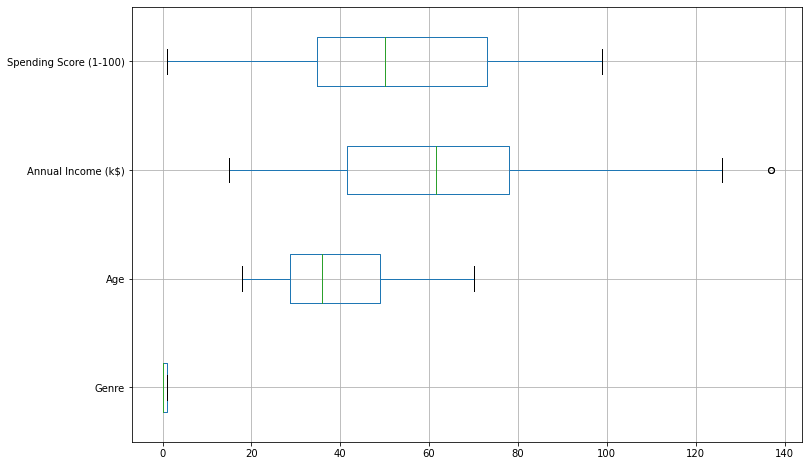

In [12]:
plt.figure(figsize = (12,8)) #boxpot-it helps to find outliers present in the given dataset 
df.boxplot(vert = 0)        

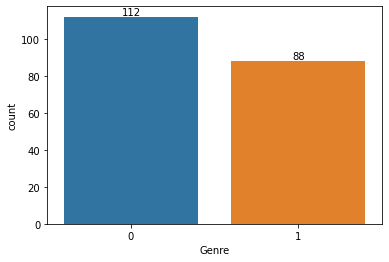

In [13]:
ax = sns.countplot(x = 'Genre',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:ylabel='Count'>

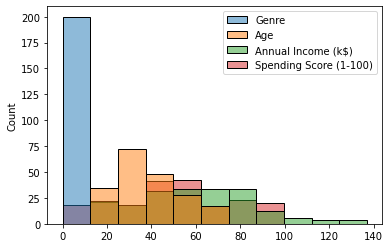

In [14]:
sns.histplot(data=df)



# <font color=#E94560>The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure. This is essential when we are exploring our dataset and trying to become familiar with it</font>

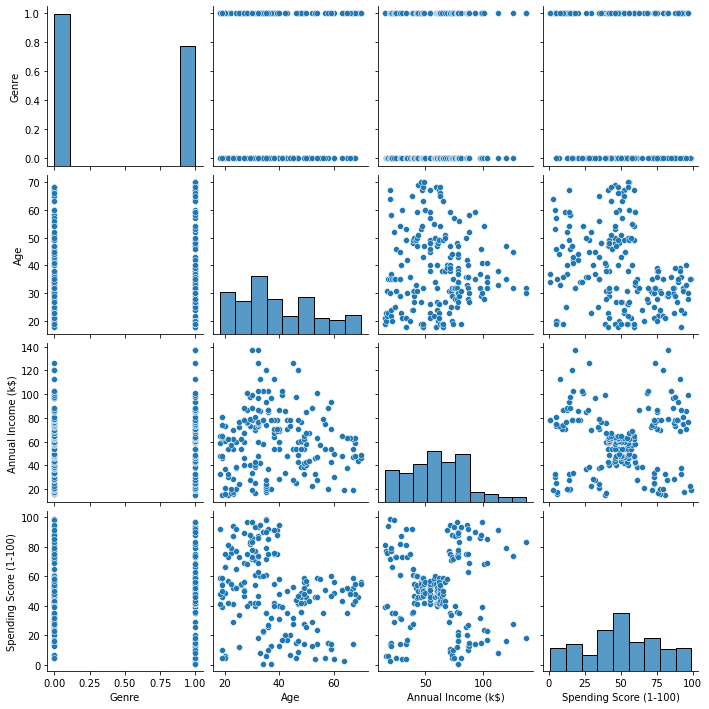

In [15]:
sns.pairplot(df)

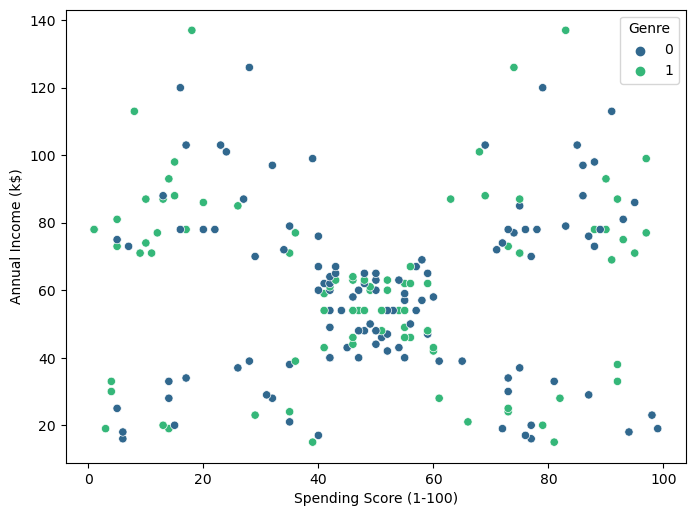

In [16]:
plt.figure(figsize=(8,6),dpi=100)
sns.scatterplot(data=df, x='Spending Score (1-100)', y='Annual Income (k$)', hue='Genre', palette='viridis');

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


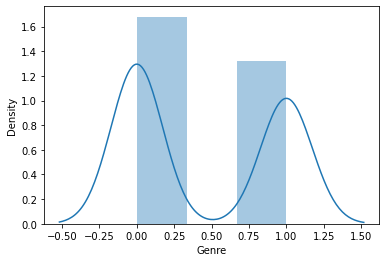

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


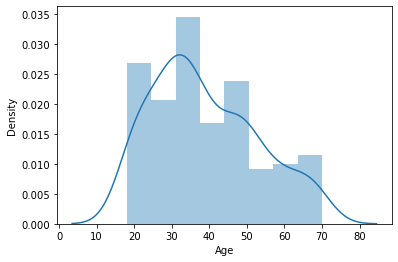

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


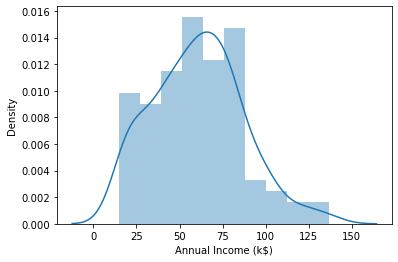

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


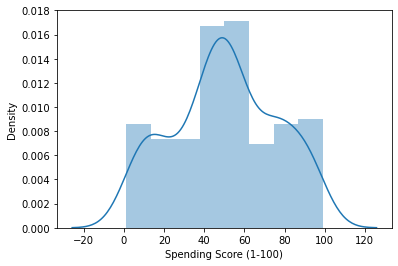

In [17]:
#dist plot
for col in df.columns:
    sns.distplot(df[col])
    plt.show()



# <font color=#E94560>About Pandas Profiling</font>

Pandas profiling is the solution to this problem. It offers report generation for the dataset with lots of features and customizations for the report generated. In this article, we will explore this library, look at all the features provided, and some of the advanced use cases and integrations that can prove useful to create stunning reports out of the data frames!

In [18]:
#generate a report
from pandas_profiling import ProfileReport
profile=ProfileReport(df)
profile

C:\Users\USER\AppData\Local\Temp\ipykernel_8796\3629164793.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]


# <font color=#E94560>As we can see the distribution of data are well symmetric to all columns</font>


# <font color=#E94560>Heatmap</font>

Heat map Heat map is used to find out the correlation between different features in the dataset.High positive or negative value shows that the features have high correlation.This helps us to select the parmeters for machine learning.

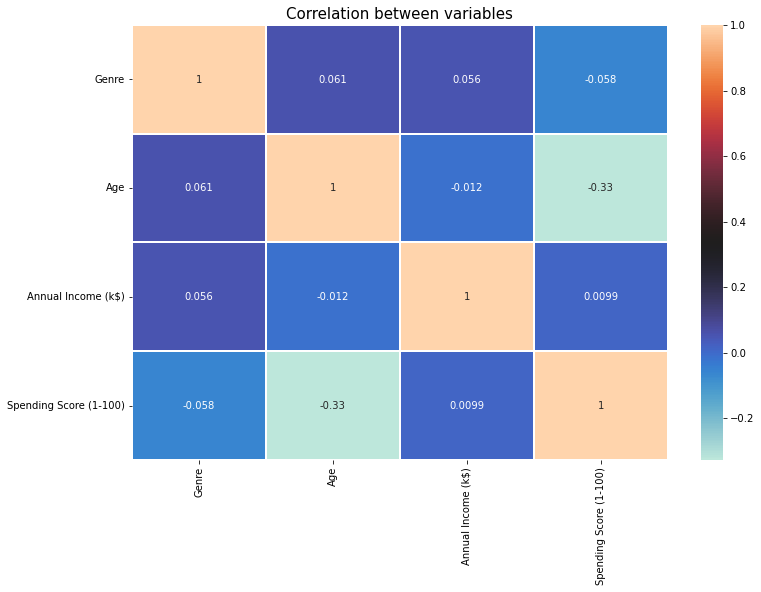

In [19]:
sns.heatmap(df.corr(),annot=True,cmap='icefire',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.title('Correlation between variables' , color='black', size=15)
plt.show()

# <div style="color:white;display:fill;border-radius:5px;background-color:#E94560;font-family:Didot;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>5 |</b> Creating Models</p></div>
<a id="5"></a>

 ## <font color=#E94560> K Means</font>
<a id="5.1"></a>

&nbsp;&nbsp;&nbsp;&nbsp;Understanding the method: <br>
&nbsp;&nbsp;&nbsp;&nbsp;https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1<br>
&nbsp;&nbsp;&nbsp;&nbsp;https://towardsdatascience.com/k-means-clustering-explained-4528df86a120<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;Official documentation: <br>
&nbsp;&nbsp;&nbsp;&nbsp;https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html<br>

 ## <font color=#E94560> Elbow method</font>
<a id="5.1"></a>

The Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters .This is how it looks...

To see what k value is good for the data, we well use the 'elbow method' by plotting a graph between sum of squared distances and k value.
To understand the method, visit the webpage:
https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

In [20]:
x = df[['Annual Income (k$)','Spending Score (1-100)']].values

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCCS')

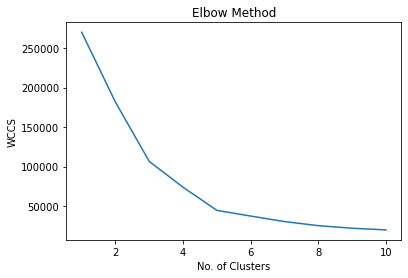

In [21]:
wcss = [] #Here what is wcss(Within cluster sum of Square) 
for k in range(1,11):#Here we will apply iteration using loop k=1,2,3,4,5,6,7,8,9,10
    kmeans = KMeans(n_clusters = k,random_state = 5)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCCS')

In [22]:
model = KMeans(n_clusters = 5,random_state = 5) #here im using k mean algoritm
cluster = model.fit_predict(x)

In [23]:
cluster

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [24]:
df.shape

(200, 4)

In [25]:
len(cluster)

200

In [26]:
df['Cluster'] = cluster

In [27]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,3
1,1,21,15,81,0
2,0,20,16,6,3
3,0,23,16,77,0
4,0,31,17,40,3


 ## <font color=#E94560> Visualize Cluster</font>
<a id="5.1"></a>

Where K is Centroid

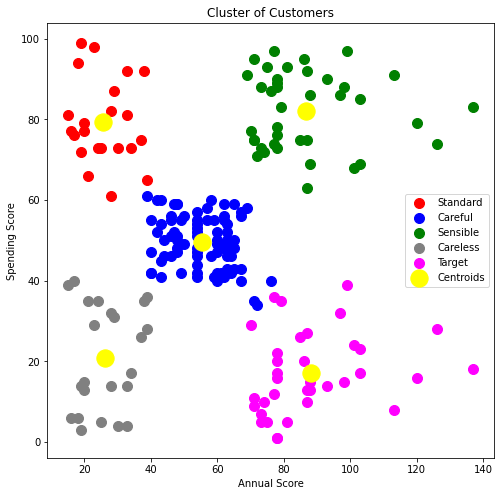

In [28]:
plt.figure(figsize = (8,8))
plt.scatter(x[cluster == 0,0],x[cluster == 0,1],s = 100,c = 'red',label = 'Standard')
plt.scatter(x[cluster == 1,0],x[cluster == 1,1],s = 100,c = 'blue',label = 'Careful')
plt.scatter(x[cluster == 2,0],x[cluster == 2,1],s = 100,c = 'green',label = 'Sensible')
plt.scatter(x[cluster == 3,0],x[cluster == 3,1],s = 100,c = 'grey',label = 'Careless')
plt.scatter(x[cluster == 4,0],x[cluster == 4,1],s = 100,c = 'magenta',label = 'Target')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster of Customers')
plt.xlabel('Annual Score')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

## <font color=#E94560>Hierarchical Clustering</font>
<a id="5.2"></a>

# &nbsp;&nbsp;&nbsp;&nbsp;<br>
&nbsp;&nbsp;&nbsp;&nbsp;Understanding the method: <br>
&nbsp;&nbsp;&nbsp;&nbsp;https://towardsdatascience.com/hierarchical-clustering-explained-e59b13846da8<br>
&nbsp;&nbsp;&nbsp;&nbsp;https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;Official documentation: <br>
&nbsp;&nbsp;&nbsp;&nbsp;https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;Difference between agglomerative clustering and divisive clustering: <br>
&nbsp;&nbsp;&nbsp;&nbsp;https://prutor.ai/hierarchical-clustering-agglomerative-and-divisive-clustering/

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(x,method = 'ward')) # ward is used for minimization of variance between data points in each clusters.
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters = 4)
hc_cluster = hc.fit_predict(x)

In [ ]:
hc_cluster

In [ ]:
df.shape

In [ ]:
len(hc_cluster)

In [ ]:
df['Cluster'] = hc_cluster

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(x[hc_cluster == 0,0],x[hc_cluster == 0,1],s = 100,c = 'red',label = 'Cluster_1')
plt.scatter(x[hc_cluster == 1,0],x[hc_cluster == 1,1],s = 100,c = 'blue',label = 'Cluster_2')
plt.scatter(x[hc_cluster == 2,0],x[hc_cluster == 2,1],s = 100,c = 'green',label = 'Cluster_3')
plt.scatter(x[hc_cluster == 3,0],x[hc_cluster == 3,1],s = 100,c = 'grey',label = 'Cluster_4')
plt.scatter(x[hc_cluster == 4,0],x[hc_cluster == 4,1],s = 100,c = 'magenta',label = 'Cluster_5')

plt.title('Cluster of Customers')
plt.xlabel('Annual Score')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

## <font color=#E94560> DBSCAN</font>
<a id="5.3"></a>

&nbsp;&nbsp;&nbsp;&nbsp;https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/<br>
&nbsp;&nbsp;&nbsp;&nbsp;https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556<br>
&nbsp;&nbsp;&nbsp;&nbsp;https://towardsdatascience.com/understanding-dbscan-and-implementation-with-python-5de75a786f9f<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;Official documentation: <br>
&nbsp;&nbsp;&nbsp;&nbsp;https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;Awesome DBSCAN visualization: <br>
&nbsp;&nbsp;&nbsp;&nbsp;https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/


In [ ]:

centers = [[1, 1], [-1, -1], [1, -1]]
x, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(x)

In [ ]:
#We can visualize the resulting data:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [ ]:

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

In [ ]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

# <font color=#E94560>Plot result</font>

In [ ]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

# <div style="color:white;display:fill;border-radius:5px;background-color:#E94560;font-family:Didot;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>6 |</b> Conclusion</p></div>
<a id="6"></a>

Step 1:Here im read the mall customer dataset with help of kaggle notebook and here we use pandas library to read our dataset

Step 2:Then i have performed data preprocessing her we check how many null values are there and check missing values or duplicates value.

  So here we can use some algoritm like isnull,describe,info() and describe() etc this function help lot for data preprocessing

Step 3:Then third step we use some visualistion method like boxpots,pairpots,histogramns and pandas-profiling and add heatmap also tto check collinearity 

Step 4:now im apply encodind in our dataset beacause it contain categorical data lke Male,Female it is must that it is in the foam of numerical beacause machine known numbers not categories

Step 5:Here we can aplly machine learning algoritm like k means,hirarchical or dbscan to find the best prediction for more information you will get back to the cell of the jupyter notebook

step 6:last session is coclusion where we can telling the steps regarding my whole process.

If you want to know that how me to doing this process and get prediction regarding my steps you will get back to upper programminng cell here you know depply understands the concept

# <font color=#E94560>Thank You</font>